In [1]:
import pandas as pd
from lloyd import lloyd
import matplotlib.pyplot as plt
import numpy as np

[array([[-1., -1.],
       [ 1.,  1.]]), array([[-0.31045845, -0.42567902],
       [ 0.19628244,  0.44964214]]), array([[-0.25834621, -0.42206371],
       [ 0.21608516,  0.37496607]]), array([[-0.2755741 , -0.37723864],
       [ 0.08416923,  0.52434748]]), array([[-0.29799044, -0.41154149],
       [ 0.1730513 ,  0.41902349]]), array([[-0.31538123, -0.34706473],
       [ 0.16392101,  0.45980231]])]


In [2]:
# Generate synthetic data
data1 = np.random.multivariate_normal(mean=[2,8], cov=[[1,0],[0,1]], size=100)
df1 = pd.DataFrame(data1, columns=["x","y"])
data2 = np.random.multivariate_normal(mean=[3,4], cov=[[1,0],[0,1]], size=100)
df2 = pd.DataFrame(data2, columns=["x","y"])

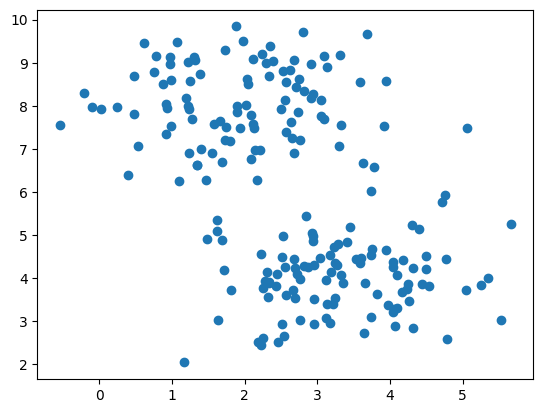

In [3]:
df = pd.concat([df1,df2])
plt.scatter(df["x"], df["y"])

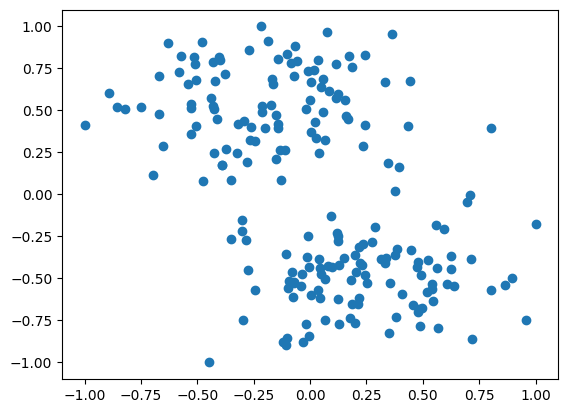

In [4]:
# normalise data to use for lloyd
from lloyd import normalise
df_normalised = normalise(df)
plt.scatter(df_normalised["x"], df_normalised["y"])

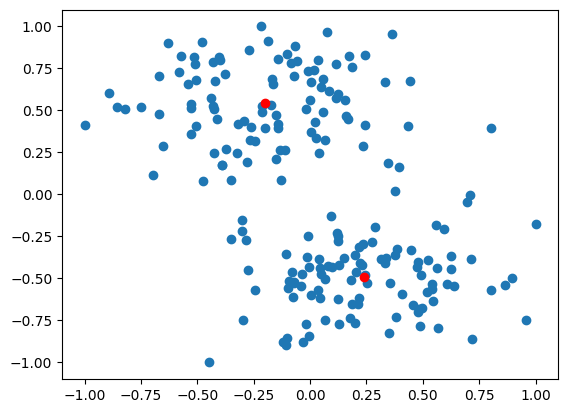

In [30]:
centers = lloyd(2, df_normalised, 5)
centers_df = pd.DataFrame(centers, columns = ["x", "y"])
plt.scatter(df_normalised["x"], df_normalised["y"])
plt.scatter(centers_df["x"], centers_df["y"], color = "red")
plt.show()

In [22]:
# now try with dplloyd and n_iter = 5
from lloyd import dplloyd
all_centers_dp = dplloyd(k=2, X=df_normalised, n_iter=5, e=1, return_steps=True)
all_centers_dpdf = pd.DataFrame(np.vstack(all_centers_dp), columns=["x", "y"])
center1 = []
center2 = []
for x in all_centers_dp:
    center1.append(x[0])
    center2.append(x[1])
center1 = pd.DataFrame(center1, columns=["x", "y"])
center2 = pd.DataFrame(center2, columns=["x", "y"])

[[-1. -1.]
 [ 1.  1.]]
end x
[[-0.09428007 -0.44305351]
 [-0.02784347  0.28781009]]
end x
[[ 0.13140204 -0.45432998]
 [-0.11424308  0.34504633]]
end x
[[ 0.21505471 -0.54872931]
 [-0.20795263  0.70082614]]
end x
[[ 0.21303114 -0.53346787]
 [-0.21363268  0.24777956]]
end x
[[ 0.19644406 -0.55838705]
 [-0.08550645  0.59419552]]
end x
          x         y
0 -1.000000 -1.000000
1 -0.094280 -0.443054
2  0.131402 -0.454330
3  0.215055 -0.548729
4  0.213031 -0.533468
5  0.196444 -0.558387


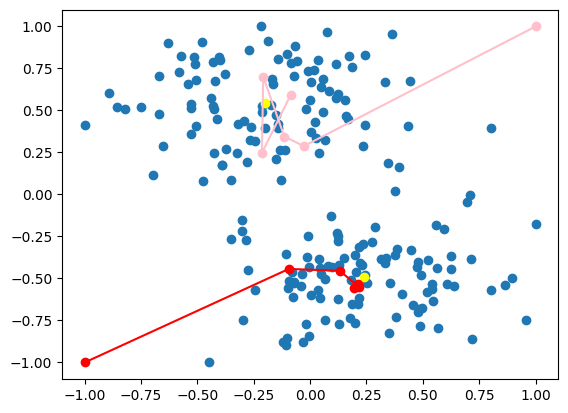

In [31]:
plt.scatter(df_normalised["x"], df_normalised["y"])
plt.scatter(centers_df["x"], centers_df["y"], color = "yellow") # yellow shows "real" centers (obtained by non private version)
plt.plot(center1["x"], center1["y"], '-o', color="red")
plt.plot(center2["x"], center2["y"], '-o', color="pink")
plt.show()

AttributeError: 'list' object has no attribute 'apply'

In [7]:
from diffprivlib.models import KMeans

In [19]:
model = KMeans(n_clusters=2, epsilon=1.0, bounds=(-1, 1))
model.fit(df_normalised)
c = pd.DataFrame(model.cluster_centers_, columns=["x", "y"])

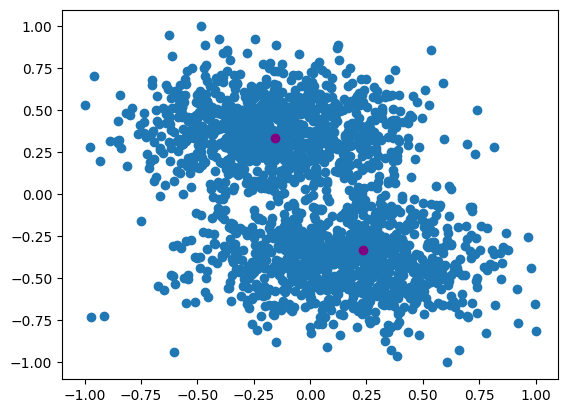

In [20]:
plt.scatter(df_normalised["x"], df_normalised["y"])
plt.scatter(c["x"], c["y"], color="purple")
plt.show()